In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer,SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# df=pd.read_csv('train.csv')
# sample_text=df["title"][0]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Sample document
document = "A stemmer for English operating on the stem cat should identify such strings as cats jumps. The jump was majastic."
document = document.lower()
print("Sample  text: ",document)
print()

Sample  text:  a stemmer for english operating on the stem cat should identify such strings as cats jumps. the jump was majastic.



In [23]:
#Sentence Tokenization 
sent_token = nltk.sent_tokenize(document)

In [24]:
#word Tokenization
tokens = nltk.word_tokenize(document)
print("Sentence Tokenized Document: ", tokens)

Sentence Tokenized Document:  ['a', 'stemmer', 'for', 'english', 'operating', 'on', 'the', 'stem', 'cat', 'should', 'identify', 'such', 'strings', 'as', 'cats', 'jumps', '.', 'the', 'jump', 'was', 'majastic', '.']


In [25]:
# Stop words removal
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]
print("Word Tokenized Document: ", tokens)

Word Tokenized Document:  ['stemmer', 'english', 'operating', 'stem', 'cat', 'identify', 'strings', 'cats', 'jumps', '.', 'jump', 'majastic', '.']


In [26]:
# stemming 
stemmer = SnowballStemmer(language='english')
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print("Stemmed Tokens: ", stemmed_tokens)


Stemmed Tokens:  ['stemmer', 'english', 'oper', 'stem', 'cat', 'identifi', 'string', 'cat', 'jump', '.', 'jump', 'majast', '.']


In [27]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
print("Lemmatized Tokens: ", lemmatized_tokens)

Lemmatized Tokens:  ['stemmer', 'english', 'oper', 'stem', 'cat', 'identifi', 'string', 'cat', 'jump', '.', 'jump', 'majast', '.']


In [28]:
# Remove punctuation marks
words_without_punctuation = []
for word in lemmatized_tokens:
    if word.isalpha():
        words_without_punctuation.append(word)

print("Words without punctuation",words_without_punctuation)

Words without punctuation ['stemmer', 'english', 'oper', 'stem', 'cat', 'identifi', 'string', 'cat', 'jump', 'jump', 'majast']


In [29]:
# POS Tagging
pos_tags = nltk.pos_tag(words_without_punctuation)
print("POS Tags: ", pos_tags)

POS Tags:  [('stemmer', 'JJ'), ('english', 'JJ'), ('oper', 'IN'), ('stem', 'NN'), ('cat', 'NN'), ('identifi', 'NN'), ('string', 'VBG'), ('cat', 'JJ'), ('jump', 'NN'), ('jump', 'NN'), ('majast', 'NN')]


[('cat', 2), ('jump', 2), ('stemmer', 1), ('english', 1), ('oper', 1), ('stem', 1), ('identifi', 1), ('string', 1), ('majast', 1)]


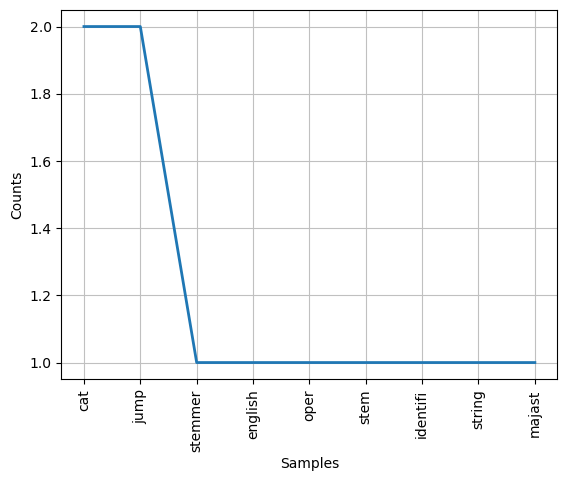

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
# counting the word occurrence using FreqDist library
freq = FreqDist(words_without_punctuation)
print(freq.most_common(10))
freq.plot(10)

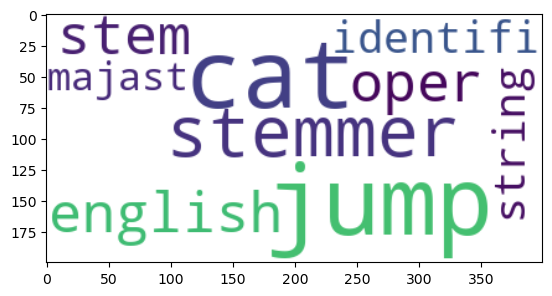

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text=' '.join(lemmatized_tokens)

wordcloud=WordCloud(width=400,height=200,background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [32]:
# assign documents
d0 = 'good boy'
d1 = 'good girl '
d2 = 'boy girl good'

# merge documents into a single corpus
string = [d0, d1, d2]
string

['good boy', 'good girl ', 'boy girl good']

In [33]:
# create object
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(string)
result

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [34]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



Word indexes:
{'good': 2, 'boy': 0, 'girl': 1}

tf-idf values in matrix form:
[[0.78980693 0.         0.61335554]
 [0.         0.78980693 0.61335554]
 [0.61980538 0.61980538 0.48133417]]
